In [30]:
#Social_Network_Ads.csv

**Importing the libraries**

In [31]:
import numpy as np
import pandas as pd
import seaborn as sn

**Importing the dataset**

In [32]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [33]:
df = df.drop("User ID",axis = 1)   # we don,t use "User ID" column ,if we are going to use "User ID" column then the model is going to over fit.
df.head()     

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [34]:
# Encoding data in column "Gender", Male = 1 and Female = 0
df['Gender'] = df['Gender'].replace(["Male","Female"],[1,0])
df.head() 

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [35]:
x = df[['Gender','Age','EstimatedSalary',]].values
y = df['Purchased'].values

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

**Feature Scaling**

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
# scaler = StandardScaler()
# scaler.fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

**Fitting Decision Tree Classification to the Training set**

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
#Instantiate a DecisionTreeClassifier as dt
dt = DecisionTreeClassifier()

In [42]:
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [43]:

from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score

In [44]:
#Reducing overfitting the model.
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth = depth)
  dt.fit(x_train,y_train)
  valAccuracy = cross_val_score(dt, x, y, cv=10)
  print("Depth  : ", depth," Cross val score : " ,np.mean(valAccuracy)) #Here depth = 2 is giving a good result, so let's carry on with depth=2


Depth  :  1  Cross val score :  0.825
Depth  :  2  Cross val score :  0.8949999999999999
Depth  :  3  Cross val score :  0.85
Depth  :  4  Cross val score :  0.8724999999999999
Depth  :  5  Cross val score :  0.8775000000000001
Depth  :  6  Cross val score :  0.8649999999999999
Depth  :  7  Cross val score :  0.86
Depth  :  8  Cross val score :  0.8550000000000001
Depth  :  9  Cross val score :  0.845
Depth  :  10  Cross val score :  0.845
Depth  :  20  Cross val score :  0.8300000000000001


In [45]:
dt = dt = DecisionTreeClassifier(max_depth = 2)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

**Predicting the Test set results**

In [46]:
y_pred = dt.predict(x_test)

**Making the Confusion Matrix**

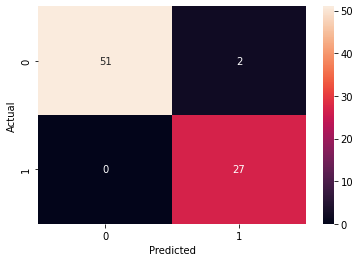

In [47]:
from sklearn.metrics import  confusion_matrix, f1_score
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

**Visualising the Training set results**

[Text(0.5, 0.8333333333333334, 'X[1] <= 44.5\ngini = 0.462\nsamples = 320\nvalue = [204, 116]'),
 Text(0.25, 0.5, 'X[2] <= 90500.0\ngini = 0.301\nsamples = 233\nvalue = [190, 43]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.09\nsamples = 191\nvalue = [182, 9]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.308\nsamples = 42\nvalue = [8, 34]'),
 Text(0.75, 0.5, 'X[1] <= 46.5\ngini = 0.27\nsamples = 87\nvalue = [14, 73]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.2\nsamples = 71\nvalue = [8, 63]')]

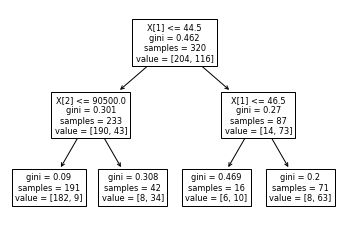

In [48]:
from sklearn import tree
tree.plot_tree(dt)

In [49]:
import matplotlib.pyplot as plt

**Visualising the Test set results**

Test set accuracy: 0.97
Test set auc: 0.98


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


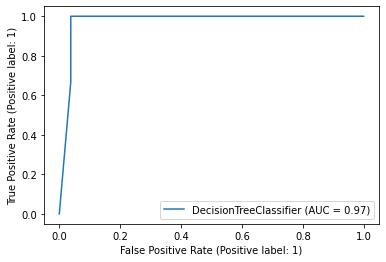

In [57]:
# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(dt, x_test, y_test)

In [58]:
acc = roc_auc_score(y_train, dt.predict(x_train))
print("Train set AUC : ", acc)

Train set AUC :  0.9072853279242732
